In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
from google.auth import default


In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Ckov0iiIOcWbuoPuK46qMWK23MqrVFQIxosv-OpELWI/edit?gid=1201080850#gid=1201080850")  # Replace with your actual sheet link

# List of sheet names for the patients
sheet_names = ["Patient01 - Heart Patient", "Patient02 - Normal", "Patient03 - Lung Disease", "Patient04 - Heat Stress & Dehydration"]


In [20]:
# Open the Google Sheet
spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Ckov0iiIOcWbuoPuK46qMWK23MqrVFQIxosv-OpELWI/edit?gid=1201080850#gid=1201080850")

# List of sheet names for the patients
sheet_names = ["Patient01 - Heart Patient", "Patient02 - Normal", "Patient03 - Lung Disease", "Patient04 - Heat Stress & Dehydration"]


# Function to remove quotation marks from column names
def remove_quotation_marks(sheet_name):
    worksheet = spreadsheet.worksheet(sheet_name)
    # Get the header row (first row)
    header = worksheet.row_values(1)
    # Remove quotation marks
    new_header = [col.replace('"', '') for col in header]
    # Update the header row in the sheet
    worksheet.update('1:1', [new_header])  # Update the first row with the new header
    print(f'Updated header in "{sheet_name}" to remove quotation marks: {new_header}')

# Function to add quotation marks to column names
def add_quotation_marks(sheet_name):
    worksheet = spreadsheet.worksheet(sheet_name)
    # Get the header row (first row)
    header = worksheet.row_values(1)
    # Add quotation marks
    new_header = [f'"{col}"' if not col.startswith('"') and not col.endswith('"') else col for col in header]
    # Update the header row in the sheet
    worksheet.update('1:1', [new_header])  # Update the first row with the new header
    print(f'Updated header in "{sheet_name}" to add quotation marks: {new_header}')

# Apply the functions to all sheets
for sheet in sheet_names:
    print(f"Processing sheet: {sheet}")
    remove_quotation_marks(sheet)  # Remove quotations
    #add_quotation_marks(sheet)     # Add quotations

Processing sheet: Patient01 - Heart Patient


<ipython-input-20-2a5899defd93>:27: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('1:1', [new_header])  # Update the first row with the new header


Updated header in "Patient01 - Heart Patient" to remove quotation marks: ['Time', 'Temperature', 'Humidity', 'Air Quality', 'Gas Status', 'Body Temperature', 'Pulse', 'Spo2']
Processing sheet: Patient02 - Normal
Updated header in "Patient02 - Normal" to remove quotation marks: ['Time', 'Temperature', 'Humidity', 'Air Quality', 'Gas Status', 'Body Temperature', 'Pulse', 'Spo2']
Processing sheet: Patient03 - Lung Disease
Updated header in "Patient03 - Lung Disease" to remove quotation marks: ['Time', 'Temperature', 'Humidity', 'Air Quality', 'Gas Status', 'Body Temperature', 'Pulse', 'Spo2']
Processing sheet: Patient04 - Heat Stress & Dehydration
Updated header in "Patient04 - Heat Stress & Dehydration" to remove quotation marks: ['Time', 'Temperature', 'Humidity', 'Air Quality', 'Gas Status', 'Body Temperature', 'Pulse', 'Spo2']


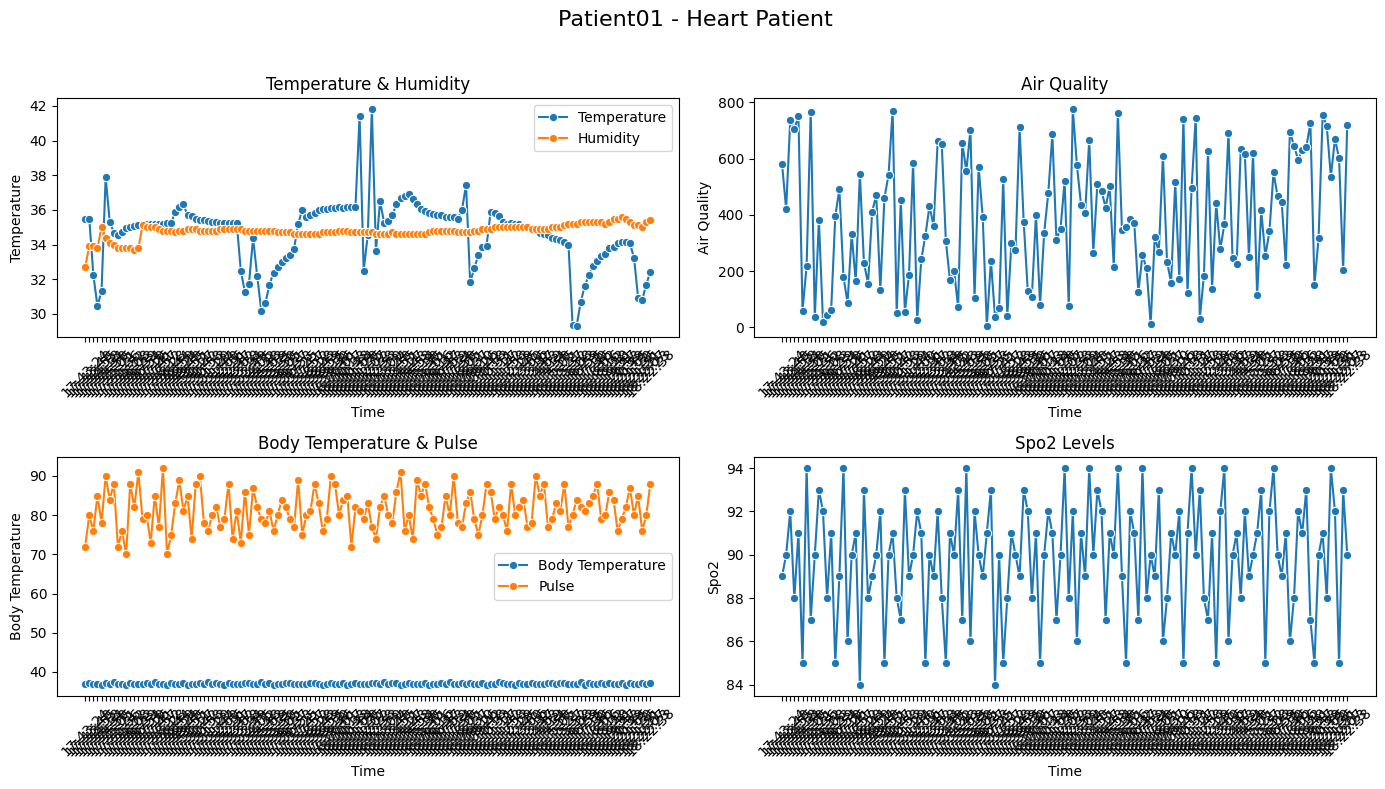

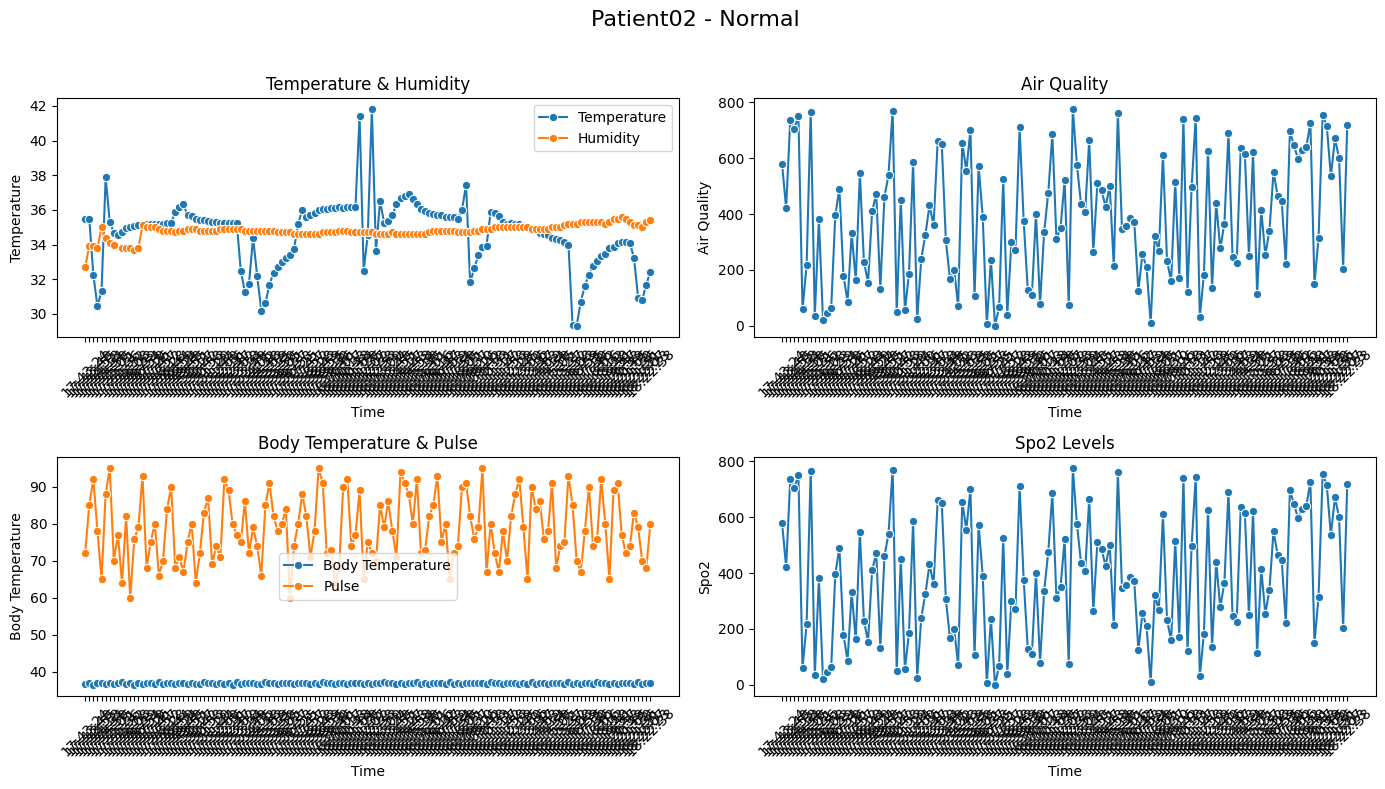

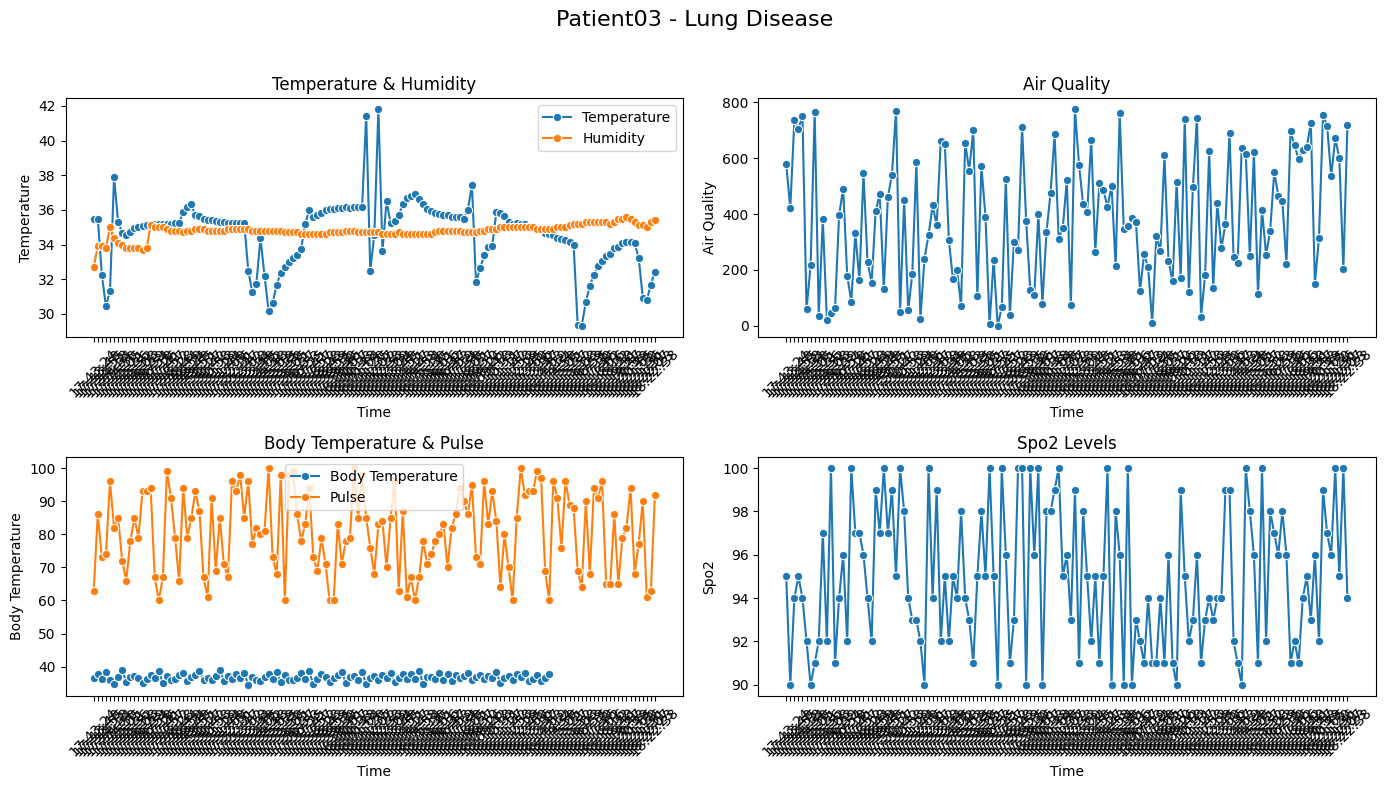

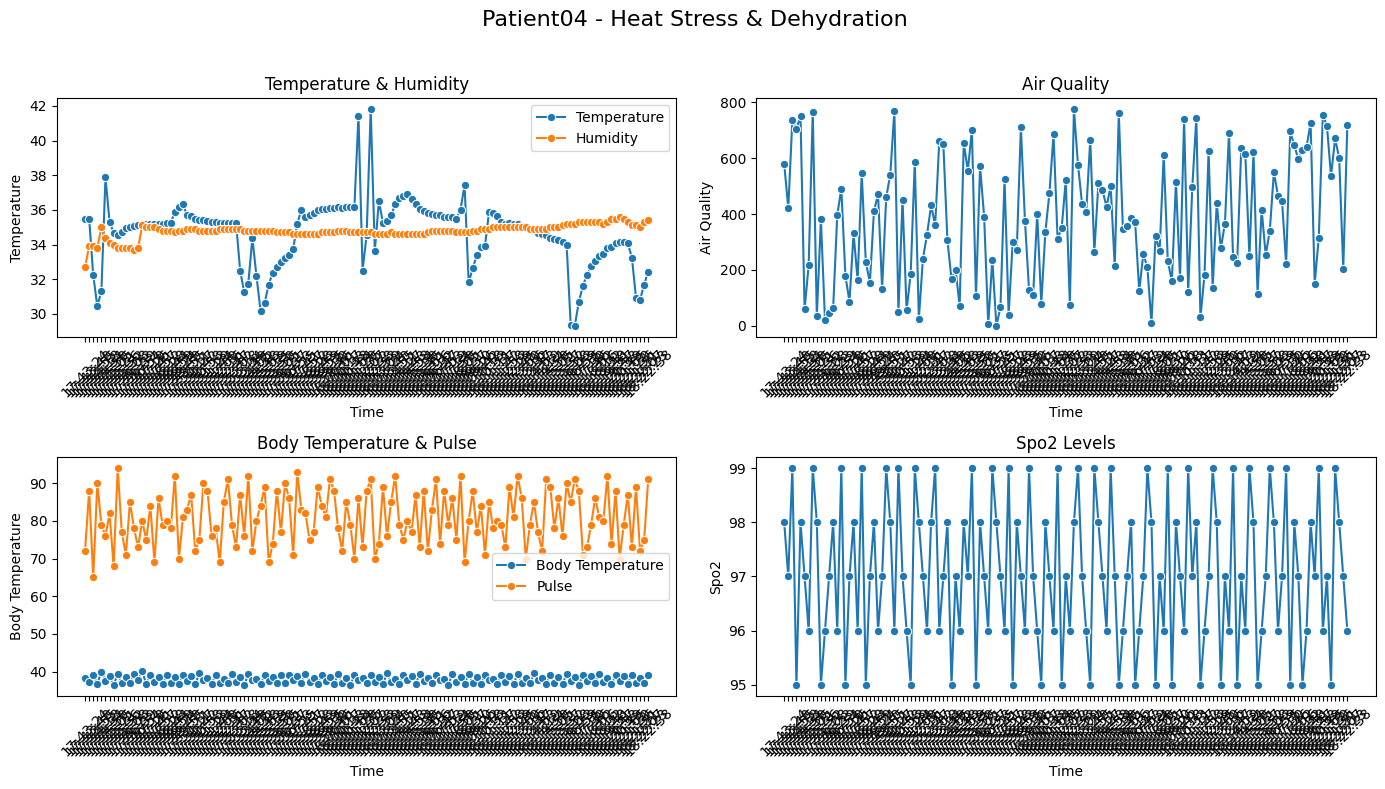

In [4]:
def plot_sheet_data(sheet_name):
    # Load data into a DataFrame
    worksheet = spreadsheet.worksheet(sheet_name)
    data = worksheet.get_all_records()
    df = pd.DataFrame(data)

    # Convert columns to numeric where applicable
    for col in ["Temperature", "Humidity", "Air Quality", "Body Temperature", "Pulse", "Spo2"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Plot each parameter
    plt.figure(figsize=(14, 8))
    plt.suptitle(sheet_name, fontsize=16)

    # Temperature and Humidity
    plt.subplot(2, 2, 1)
    sns.lineplot(x="Time", y="Temperature", data=df, label="Temperature", marker="o")
    sns.lineplot(x="Time", y="Humidity", data=df, label="Humidity", marker="o")
    plt.xticks(rotation=45)
    plt.title("Temperature & Humidity")
    plt.legend()

    # Air Quality
    plt.subplot(2, 2, 2)
    sns.lineplot(x="Time", y="Air Quality", data=df, marker="o")
    plt.xticks(rotation=45)
    plt.title("Air Quality")

    # Body Temperature and Pulse
    plt.subplot(2, 2, 3)
    sns.lineplot(x="Time", y="Body Temperature", data=df, label="Body Temperature", marker="o")
    sns.lineplot(x="Time", y="Pulse", data=df, label="Pulse", marker="o")
    plt.xticks(rotation=45)
    plt.title("Body Temperature & Pulse")
    plt.legend()

    # Spo2
    plt.subplot(2, 2, 4)
    sns.lineplot(x="Time", y="Spo2", data=df, marker="o")
    plt.xticks(rotation=45)
    plt.title("Spo2 Levels")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

for sheet in sheet_names:
    plot_sheet_data(sheet)

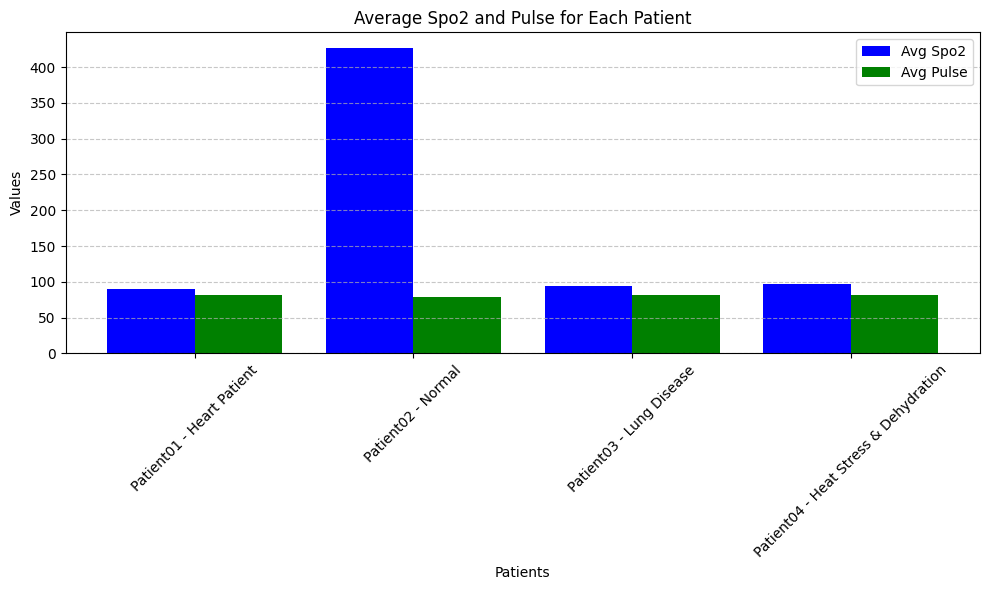

In [9]:
import gspread
from google.colab import auth
from google.auth import default
import matplotlib.pyplot as plt

# Authenticate and access Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Ckov0iiIOcWbuoPuK46qMWK23MqrVFQIxosv-OpELWI/edit?usp=sharing")

# List of sheet names for the patients
sheet_names = ["Patient01 - Heart Patient", "Patient02 - Normal", "Patient03 - Lung Disease", "Patient04 - Heat Stress & Dehydration"]

# Create or select a Summary sheet to store results
try:
    summary_sheet = spreadsheet.worksheet("Summary")
except gspread.exceptions.WorksheetNotFound:
    summary_sheet = spreadsheet.add_worksheet(title="Summary", rows="100", cols="10")
    summary_sheet.append_row(["Patient", "Avg Spo2 (%)", "Avg Pulse (bpm)"])

# Function to process Spo2 and Pulse data
def analyze_patient_data(sheet):
    try:
        data = sheet.get_all_values()
        header = data[0]  # Extract the header
        rows = data[1:]   # Exclude the header

        # Ensure the columns exist in the sheet
        spo2_index = header.index("Spo2")
        pulse_index = header.index("Pulse")

        # Extract the last 50 rows
        last_50_rows = rows[-50:] if len(rows) >= 50 else rows
        spo2_values = []
        pulse_values = []

        for row in last_50_rows:
            try:
                # Convert Spo2 and Pulse values to float
                spo2 = float(row[spo2_index])
                pulse = float(row[pulse_index])
                spo2_values.append(spo2)
                pulse_values.append(pulse)
            except (ValueError, IndexError):
                print(f"Skipping invalid data row: {row}")
                continue

        # Calculate averages
        avg_spo2 = sum(spo2_values) / len(spo2_values) if spo2_values else 0
        avg_pulse = sum(pulse_values) / len(pulse_values) if pulse_values else 0

        return avg_spo2, avg_pulse

    except Exception as e:
        print(f"Error processing sheet {sheet.title}: {e}")
        return 0, 0

# Analyze data for each patient and update the Summary sheet
results = []
for sheet_name in sheet_names:
    sheet = spreadsheet.worksheet(sheet_name)
    avg_spo2, avg_pulse = analyze_patient_data(sheet)
    results.append((sheet_name, avg_spo2, avg_pulse))
    summary_sheet.append_row([sheet_name, round(avg_spo2, 2), round(avg_pulse, 2)])

# Visualization
patients = [result[0] for result in results]
spo2_values = [result[1] for result in results]
pulse_values = [result[2] for result in results]

x = range(len(patients))

plt.figure(figsize=(10, 6))

# Plot Spo2
plt.bar(x, spo2_values, width=0.4, label='Avg Spo2', color='blue', align='center')

# Plot Pulse
plt.bar([p + 0.4 for p in x], pulse_values, width=0.4, label='Avg Pulse', color='green', align='center')

plt.xlabel('Patients')
plt.ylabel('Values')
plt.title('Average Spo2 and Pulse for Each Patient')
plt.xticks([p + 0.2 for p in x], patients, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Skipping invalid data row: ['18:14:50', '34.56', '34.9', '616', '616 (Normal)', '', '96', '100']
Skipping invalid data row: ['18:15:05', '34.38', '35', '249', '249 (Normal)', '', '91', '98']
Skipping invalid data row: ['18:15:21', '34.31', '35', '621', '621 (Normal)', '', '76', '96']
Skipping invalid data row: ['18:15:37', '34.25', '35', '113', '113 (Normal)', '', '96', '91']
Skipping invalid data row: ['18:15:52', '34.13', '35.1', '416', '416 (Normal)', '', '89', '100']
Skipping invalid data row: ['18:16:08', '34', '35.2', '253', '253 (Normal)', '', '88', '92']
Skipping invalid data row: ['18:16:23', '29.37', '35.2', '341', '341 (Normal)', '', '69', '98']
Skipping invalid data row: ['18:16:59', '29.31', '35.2', '551', '551 (Normal)', '', '64', '97']
Skipping invalid data row: ['18:17:15', '30.69', '35.3', '466', '466 (Normal)', '', '90', '96']
Skipping invalid data row: ['18:17:30', '31.62', '35.3', '446', '446 (Normal)', '', '68', '98']
Skipping invalid data row: ['18:17:46', '32.25'

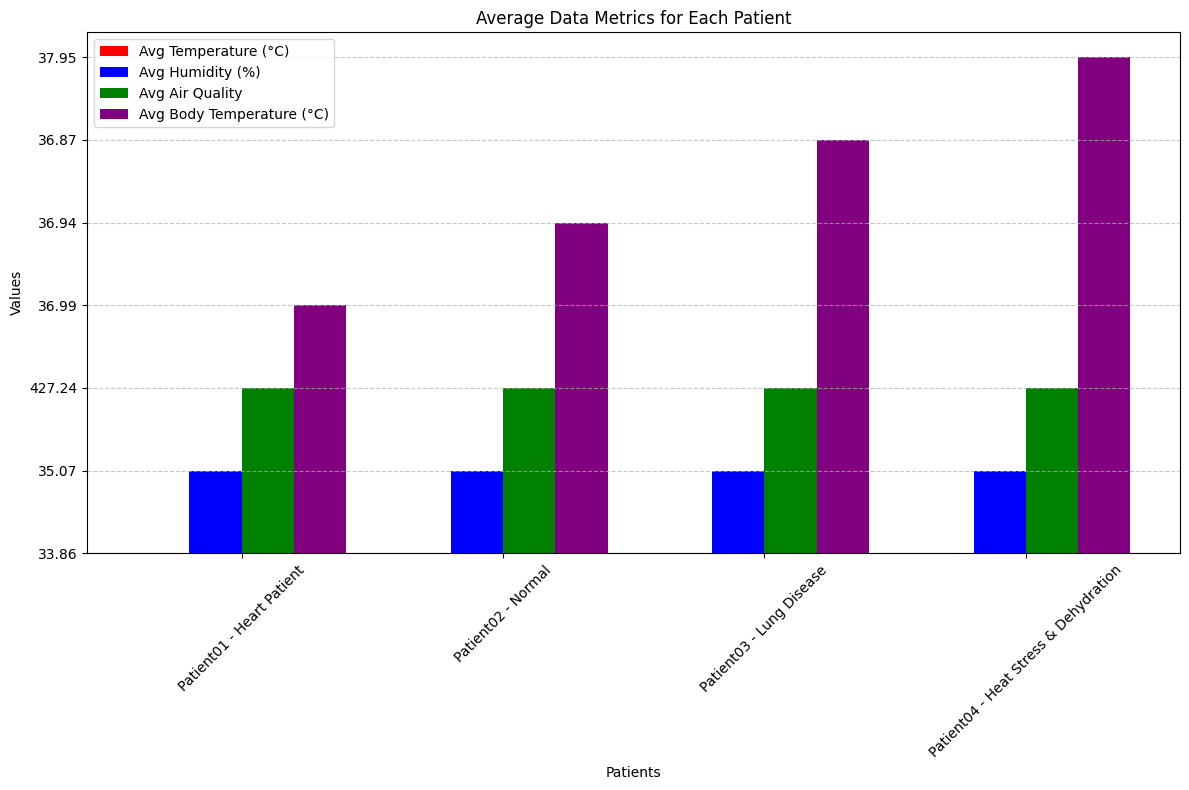

In [8]:
import gspread
from google.colab import auth
from google.auth import default
import matplotlib.pyplot as plt

# Authenticate and access Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Ckov0iiIOcWbuoPuK46qMWK23MqrVFQIxosv-OpELWI/edit?usp=sharing")

# List of sheet names for the patients
sheet_names = ["Patient01 - Heart Patient", "Patient02 - Normal", "Patient03 - Lung Disease", "Patient04 - Heat Stress & Dehydration"]

# Create or select a Summary sheet to store results
try:
    summary_sheet = spreadsheet.worksheet("Summary")
    summary_sheet.clear()  # Clear previous data to avoid duplication
    summary_sheet.append_row(["Patient", "Avg Temperature (°C)", "Avg Humidity (%)", "Avg Air Quality", "Avg Body Temperature (°C)", "Avg Gas Status"])
except gspread.exceptions.WorksheetNotFound:
    summary_sheet = spreadsheet.add_worksheet(title="Summary", rows="100", cols="10")
    summary_sheet.append_row(["Patient", "Avg Temperature (°C)", "Avg Humidity (%)", "Avg Air Quality", "Avg Body Temperature (°C)", "Avg Gas Status"])

# Function to process all relevant data except Pulse and Spo2
def analyze_patient_data(sheet):
    try:
        data = sheet.get_all_values()
        header = data[0]  # Extract the header
        rows = data[1:]   # Exclude the header

        # Ensure the relevant columns exist
        indices = {
            "Temperature": header.index("Temperature"),
            "Humidity": header.index("Humidity"),
            "Air Quality": header.index("Air Quality"),
            "Gas Status": header.index("Gas Status"),
            "Body Temperature": header.index("Body Temperature")
        }

        # Extract the last 50 rows
        last_50_rows = rows[-50:] if len(rows) >= 50 else rows
        values = {key: [] for key in indices}

        for row in last_50_rows:
            try:
                # Convert the relevant data columns to float and store them
                for key, index in indices.items():
                    value = row[index]
                    # Remove additional text for Gas Status (e.g., "Normal")
                    if key == "Gas Status":
                        value = value.split()[0]
                    values[key].append(float(value))
            except (ValueError, IndexError):
                print(f"Skipping invalid data row: {row}")
                continue

        # Calculate averages for all data columns
        averages = {key: sum(values[key]) / len(values[key]) if values[key] else 0 for key in values}

        return averages

    except Exception as e:
        print(f"Error processing sheet {sheet.title}: {e}")
        return {key: 0 for key in ["Temperature", "Humidity", "Air Quality", "Gas Status", "Body Temperature"]}

# Analyze data for each patient and update the Summary sheet
for sheet_name in sheet_names:
    sheet = spreadsheet.worksheet(sheet_name)
    averages = analyze_patient_data(sheet)
    summary_sheet.append_row([
        sheet_name,
        round(averages["Temperature"], 2),
        round(averages["Humidity"], 2),
        round(averages["Air Quality"], 2),
        round(averages["Body Temperature"], 2),
        round(averages["Gas Status"], 2)
    ])

# Visualization
patients = sheet_names
temperature = [summary_sheet.row_values(i + 2)[1] for i in range(len(sheet_names))]
humidity = [summary_sheet.row_values(i + 2)[2] for i in range(len(sheet_names))]
air_quality = [summary_sheet.row_values(i + 2)[3] for i in range(len(sheet_names))]
body_temperature = [summary_sheet.row_values(i + 2)[4] for i in range(len(sheet_names))]

# Plotting
x = range(len(patients))

plt.figure(figsize=(12, 8))

# Temperature
plt.bar(x, temperature, width=0.2, label='Avg Temperature (°C)', color='red', align='center')

# Humidity
plt.bar([p + 0.2 for p in x], humidity, width=0.2, label='Avg Humidity (%)', color='blue', align='center')

# Air Quality
plt.bar([p + 0.4 for p in x], air_quality, width=0.2, label='Avg Air Quality', color='green', align='center')

# Body Temperature
plt.bar([p + 0.6 for p in x], body_temperature, width=0.2, label='Avg Body Temperature (°C)', color='purple', align='center')

plt.xlabel('Patients')
plt.ylabel('Values')
plt.title('Average Data Metrics for Each Patient')
plt.xticks([p + 0.3 for p in x], patients, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
